# **Soal No 1**

# `Metode Regula Falsi (False Position)`
## Pendahuluan
Metode Regula Falsi merupakan pengembangan dari Metode Bagi Dua (Bisection Method). Prinsip utamanya adalah menggunakan dua titik awal yang mengapit akar dan memperkirakan akar menggunakan garis lurus yang menghubungkan titik-titik tersebut.

Metode ini didasarkan pada konsep interpolasi linear, di mana perkiraan akar baru diperoleh dari persamaan garis lurus yang melewati dua titik fungsi yang berbeda tanda. Keunggulan metode ini adalah tetap mempertahankan jaminan konvergensi seperti metode bagi dua, tetapi dengan kecepatan yang lebih tinggi dalam beberapa kasus.

Metode ini memiliki kelebihan dan kekurangan, diantaranya :
* Kelebihan, Konvergen seperti metode bagi dua (akar tetap berada dalam interval)
dan Lebih cepat dari metode bagi dua dalam beberapa kasus
* Kekurangan, Bisa mengalami konvergensi yang sangat lambat jika fungsi memiliki kemiringan kecil di salah satu ujung interval


## Algoritma
Langkah Langkah Algoritma
1. Tentukan dua titik awal $ x_0 $ dan $ x_1 $ sedemikian rupa sehingga $ f(x_0) $ dan $ f(x_1) $ memiliki tanda yang berlawanan (ada akar di antara keduanya).
2. Hitung titik perkiraan akar $ x_2 $ menggunakan rumus interpolasi linear :
$ x_0 = x_1 - \frac{f(x_1) \cdot (x_1 - x_0) }{f(x_o) - f(x_0)} $
3. Evaluasi $ f(x_2) $ :
- Jika $ f(x_2) $ sangat kecil atau mendekati nol (sesuai toleransi), maka $ x_2 $ adalah akar dan algoritma berhenti.
- Jika $ f(x_0) \cdot f(x_2) < 0 $, maka akar berada antara $ x_0 $ dan $ x_2$, sehingga perbarui $ x_1 = x_2 $.
- Jika $ f(x_1) \cdot f(x_2) < 0 $, maka akar berada antara $ x_2 $ dan $ x_1 $, sehingga perbarui $ x_0 = x_2 $.
4. Ulangi langkah 2 dan 3 hingga nilai error lebih kecil dari toleransi atau jumlah iterasi maksimum tercapai.



## *Pseudocode*
1. Input: $ f(x), x_0, x_1 $, toleransi, iter_max
2. Jika $ f(x_0) \cdot f(x_1) ≥ 0 $, keluar (interval tidak valid)
3. Untuk iterasi ke-1 hingga iter_max :
* Hitung $ x_2 = x_1 - (f(x_1) \cdot (x_1 - x_0)) / (f(x_1) - f(x_0)) $
* Jika $ |f(x2)| < $ toleransi, return $ x_2 $ (akar ditemukan)
* Jika $ f(x_0) \cdot f(x_2) < 0 $, maka $ x_1 = x_2 $
       Jika tidak, maka $ x_0 = x_2 $
4. Jika iterasi maksimum tercapai, return $ x_2 $ (perkiraan akar)


## Implementasi dalam Pyhton

In [ ]:
def regula_falsi(f, x0, x1, tol=1e-6, max_iter=100):
    if f(x0) * f(x1) >= 0:
        print("Interval tidak valid. f(x0) dan f(x1) harus memiliki tanda berlawanan.")
        return None

    for i in range(max_iter):
        # Hitung x2 dengan rumus Regula Falsi
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))

        # Jika nilai f(x2) cukup kecil, maka akar ditemukan
        if abs(f(x2)) < tol:
            return x2

        # Perbarui interval [x0, x1]
        if f(x0) * f(x2) < 0:
            x1 = x2
        else:
            x0 = x2

    print("Metode tidak konvergen dalam jumlah iterasi maksimum.")
    return x2  # Perkiraan akar terakhir

# Contoh penggunaan dengan fungsi f(x) = x^3 - x - 2
def f(x):
    return x**3 - x - 2

# Menentukan akar dalam interval [1, 2]
akar = regula_falsi(f, 1, 2)
if akar is not None:
    print(f"Akar ditemukan: {akar:.6f}")


Akar ditemukan: 2.7065279131342495


## Aplikasi Fisika
**Menentukan Kecepatan Terminal Benda yang Jatuh dalam Fluida** 

Ketika sebuah benda jatuh dalam fluida, gaya hambat akibat viskositas bekerja pada benda tersebut. Kecepatan terminal $ v_t $ adalah kecepatan maksimum ketika gaya berat seimbang dengan gaya hambat. Persamaan keseimbangan gaya:\
$ mg - bv = 0 $ \
dimana :
* $ m $ : massa benda (kg)
* $ g $ : percepatan gravitasi (9.81 m/$ s^2 $)
* $ b $ : koefisien hambatan fluida (Ns/$ m^2 $)
* $ v $ : kecepatan benda (m/s)\

sehingga akar persamaan yang ingin kita cari:\
$ f(v) = mg - bv^2 $

## Implementasi dalam Python

In [1]:
def regula_falsi(f, x0, x1, tol=1e-6, max_iter=100):
    if f(x0) * f(x1) >= 0:
        print("Interval tidak valid. f(x0) dan f(x1) harus memiliki tanda berlawanan.")
        return None

    for i in range(max_iter):
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))  # Rumus Regula Falsi
        
        if abs(f(x2)) < tol:  # Konvergen jika f(x2) mendekati nol
            return x2

        if f(x0) * f(x2) < 0:  # Akar ada di interval [x0, x2]
            x1 = x2
        else:  # Akar ada di interval [x2, x1]
            x0 = x2

    print("Metode tidak konvergen dalam jumlah iterasi maksimum.")
    return x2

# Parameter fisik
m = 70  # kg (massa benda)
g = 9.81  # m/s² (gravitasi)
b = 12.5  # Ns/m² (koefisien hambatan)

# Fungsi kecepatan terminal
f = lambda v: (m * g) - (b * v**2)

# Menentukan akar (kecepatan terminal)
vt = regula_falsi(f, 0, 10)
print(f"Kecepatan terminal: {vt:.4f} m/s")

Kecepatan terminal: 7.4119 m/s


# `Metode Secant`
## Pendahuluan
Metode Secant adalah pengembangan dari Metode Newton-Raphson, tetapi tanpa memerlukan turunan dari fungsi. Dalam metode ini, akar didekati dengan menggunakan dua titik awal dan menggambar garis secant yang memotong sumbu-x. Perkiraan akar berikutnya diperoleh dari perpotongan garis secant ini dengan sumbu-x.Metode ini dapat lebih cepat daripada Regula Falsi, tetapi tidak selalu menjamin bahwa akar tetap dalam interval yang diberikan.
Metode ini memiliki kelebihan dan kekurangan, diantaranya :
* Kelebihan, Lebih cepat dari metode Regula Falsi dalam banyak kasus, Tidak memerlukan perhitungan turunan seperti metode Newton-Raphson
* Kekurangan, Tidak selalu konvergen (bisa gagal jika dua titik awal tidak dipilih dengan baik), Bisa menghasilkan nilai akar yang berada di luar interval awal.

## Algoritma
Langkah - langkah Algoritma
1. Pilih dua titik awal $ x_0 $ dan $ x_1 $
2. Hitung titik baru $ x_2 $ menggunakan rumus :\
$ x_2 = x_1 - \frac{f(x_1) \cdot f(x_1 - x_0)}{f(x_1) - f(x_0)} $
3. Periksa apakah $ |x_2 - x_1| $ atau $ |f(x_2) $ kurang dari toleransi yang diinginkan:
    - Jika ya, maka $ x_2 $ adalah akar dan algoritma berhenti.
    - Jika tidak, diperbarui nilai:
        - $ x_0 $ menjadi $ x_1 $
        - $ x_1 $ menjadi $ x_2 $
4. Ulangi langkah 2 dan 3 hingga konvergen atau jumlah iterasi maksimum tercapai.     

## *Pseudocode*
1. Input: $ f(x), x0, x1 $, toleransi, iter_max
2. Untuk iterasi ke-1 hingga iter_max:\
    a. Hitung  $ x_2 = x_1 - (f(x_1) * (x_1 - x_0)) / (f(x_1) - f(x_0)) $\
    b. Jika $ |x2 - x1| < $ toleransi atau $ |f(x_2)| < $ toleransi, return $ x_2 $ (akar ditemukan)\
    c. Perbarui $ x_0 = x_1, x_1 = x_2 $
3. Jika iterasi maksimum tercapai, return x2 (perkiraan akar).


## Implementasi dalam Pyhton

In [2]:
import numpy as np

def regula_falsi(f, x0, x1, tol=1e-6, max_iter=100):
    if f(x0) * f(x1) >= 0:
        print("Interval tidak valid. f(x0) dan f(x1) harus memiliki tanda berlawanan.")
        return None

    for i in range(max_iter):
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))  # Rumus Regula Falsi
        
        if abs(f(x2)) < tol:  # Konvergen jika f(x2) mendekati nol
            return x2

        if f(x0) * f(x2) < 0:  # Akar ada di interval [x0, x2]
            x1 = x2
        else:  # Akar ada di interval [x2, x1]
            x0 = x2

    print("Metode tidak konvergen dalam jumlah iterasi maksimum.")
    return x2

# Contoh penggunaan
f = lambda x: x**3 - 4*x - 9  # Contoh fungsi
akar = regula_falsi(f, 2, 3)
print("Akar ditemukan:", akar)

Akar ditemukan: 2.7065279131342495


## Aplikasi Fisika
**Mencari Suhu di Permukaan Plat dengan Hukum Stefan-Boltzmann**

Hukum Stefan-Boltzmann menyatakan bahwa daya yang dipancarkan oleh benda hitam berbanding lurus dengan pangkat empat suhu:\
$ P = \sigma AT^4 $

dimana:
- $ P $ : daya yang dipancarkan (W)
- $ \sigma $ : konstanta Stefan-Boltzmann $ (5.67 \cdot 10^-8W/m^2K^4 ) $
- $ A $ = luas permukaan benda $ (m^2) $
- $ T $ = suhu benda (K)


## Implementasi dalam Python

Suhu permukaan benda: 306.4409 K


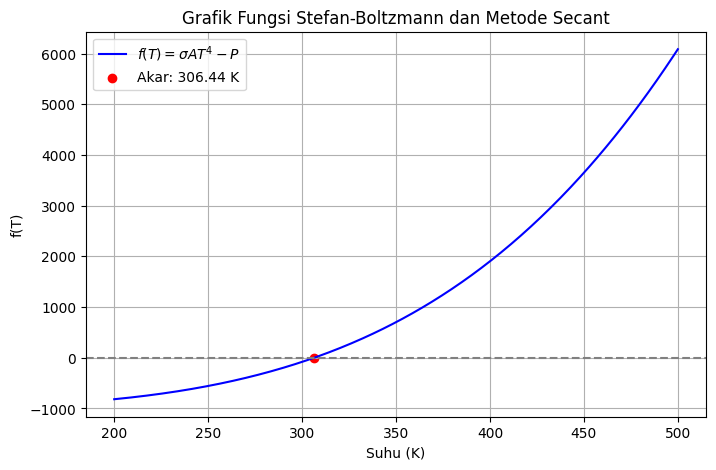

In [7]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        if abs(f(x1) - f(x0)) < 1e-10:  # Hindari pembagian dengan nol
            print("Dekomposisi gagal (pembagian oleh nilai sangat kecil).")
            return None
        
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))  # Rumus Secant
        
        if abs(x2 - x1) < tol:  # Konvergen jika perubahan sangat kecil
            return x2

        x0, x1 = x1, x2  # Perbarui nilai untuk iterasi berikutnya

    print("Metode tidak konvergen dalam jumlah iterasi maksimum.")
    return x2

# Parameter fisik
sigma = 5.67e-8  # W/m²K⁴ (konstanta Stefan-Boltzmann)
A = 2  # m² (luas permukaan benda)
P = 1000  # W (daya yang dipancarkan)

# Fungsi suhu berdasarkan hukum Stefan-Boltzmann
f = lambda T: (sigma * A * T**4) - P

# Menentukan akar (suhu benda) dengan metode Secant
T_surface = secant_method(f, 200, 500)
print(f"Suhu permukaan benda: {T_surface:.4f} K")

import numpy as np
import matplotlib.pyplot as plt

# Rentang suhu untuk grafik
T_values = np.linspace(200, 500, 400)  # Rentang suhu dari 200K sampai 500K
f_values = [f(T) for T in T_values]  # Hitung nilai fungsi untuk setiap suhu T

# Membuat plot
plt.figure(figsize=(8, 5))
plt.plot(T_values, f_values, label=r'$f(T) = \sigma A T^4 - P$', color='b')  # Plot kurva fungsi
plt.axhline(0, color='gray', linestyle='--')  # Garis y = 0 sebagai referensi
plt.scatter(T_surface, 0, color='red', label=f'Akar: {T_surface:.2f} K')  # Titik akar

# Label dan judul
plt.xlabel('Suhu (K)')
plt.ylabel('f(T)')
plt.title('Grafik Fungsi Stefan-Boltzmann dan Metode Secant')
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()
